In [3]:
import pandas as pd

In [8]:
df = pd.read_csv(
    "Student_Satisfaction_Survey.csv",
    encoding="latin1"
)

df.head()


,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
3,4,1,12,The teachers approach to teaching can best be...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
4,5,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY


In [9]:
# Remove unnamed index columns
df.drop(columns=[col for col in df.columns if 'unnamed' in col.lower()],
        inplace=True, errors='ignore')

In [10]:
# Convert rating columns to numeric
rating_cols = df.select_dtypes(include=['int64', 'float64']).columns


In [11]:
# Fill missing values
df[rating_cols] = df[rating_cols].fillna(df[rating_cols].mean())

In [12]:
df.info

<bound method DataFrame.info of      SN  Total Feedback Given  Total Configured  \
0     1                     1                12   
1     2                     1                12   
2     3                     1                12   
3     4                     1                12   
4     5                     1                12   
..   ..                   ...               ...   
575  16                     9               170   
576  17                     9               170   
577  18                     9               170   
578  19                     9               170   
579  20                     9               170   

                                             Questions  Weightage 1  \
0    How much of the syllabus was covered in the cl...            0   
1    How well did the teachers prepare for the clas...            0   
2      How well were the teachers able to communicate?            0   
3    The teachers approach to teaching can best be...            0   
4    Fairness of the internal evaluation process by...            0   
..                                                 ...          ...   
575  The institute/ teachers use student-centric me...            1   
576  Teachers encourage you to participate in extra...            0   
577  Efforts are made by the institute/ teachers to...            0   
578  What percentage of teachers use ICT tools such...            0   
579  The overall quality of the teaching-learning p...            0   

     Weightage 2  Weightage 3  Weightage 4  Weightage 5 Average/ Percentage  \
0              0            1            0            0        3.00 / 60.00   
1              0            0            0            1       5.00 / 100.00   
2              0            0            0            1       5.00 / 100.00   
3              0            1            0            0        3.00 / 60.00   
4              0            0            1            0        4.00 / 80.00   
..           ...          ...          ...          ...                 ...   
575            0            0            2            6        4.33 / 86.67   
576            0            0            3            6        4.67 / 93.33   
577            0            1            2            6        4.56 / 91.11   
578            0            1            3            5        4.44 / 88.89   
579            0            1            2            6        4.56 / 91.11   

                 Course Name            Basic Course  
0    FY B.VOC FOOD TECHNOLOGY  B.VOC FOOD TECHNOLOGY  
1    FY B.VOC FOOD TECHNOLOGY  B.VOC FOOD TECHNOLOGY  
2    FY B.VOC FOOD TECHNOLOGY  B.VOC FOOD TECHNOLOGY  
3    FY B.VOC FOOD TECHNOLOGY  B.VOC FOOD TECHNOLOGY  
4    FY B.VOC FOOD TECHNOLOGY  B.VOC FOOD TECHNOLOGY  
..                        ...                    ...  
575                    TYBSC     BACHELOR OF SCIENCE  
576                    TYBSC     BACHELOR OF SCIENCE  
577                    TYBSC     BACHELOR OF SCIENCE  
578                    TYBSC     BACHELOR OF SCIENCE  
579                    TYBSC     BACHELOR OF SCIENCE  

[580 rows x 12 columns]>

In [13]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df['overall_satisfaction'] = df[numeric_cols].mean(axis=1)
df[['overall_satisfaction']].head()


,overall_satisfaction
0,1.875
1,2.000
2,2.125
3,2.250
4,2.375


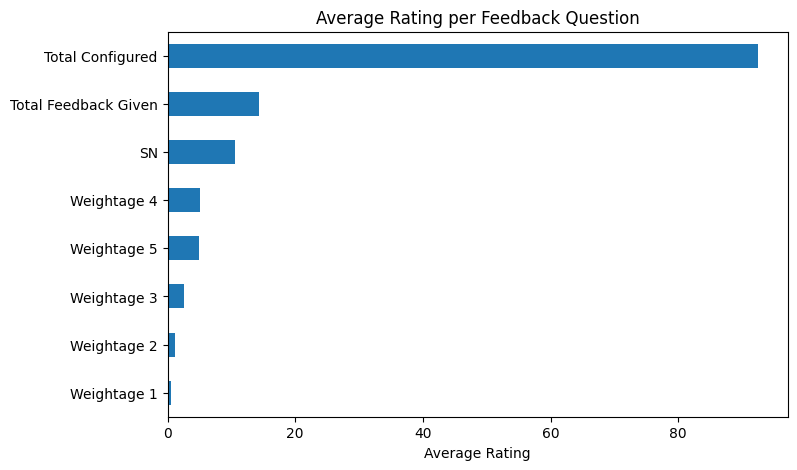

In [14]:
avg_ratings = df[numeric_cols].mean().sort_values()

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
avg_ratings.plot(kind='barh')
plt.xlabel("Average Rating")
plt.title("Average Rating per Feedback Question")
plt.show()

In [15]:
# Reset everything to avoid old plots
%matplotlib inline
plt.close('all')

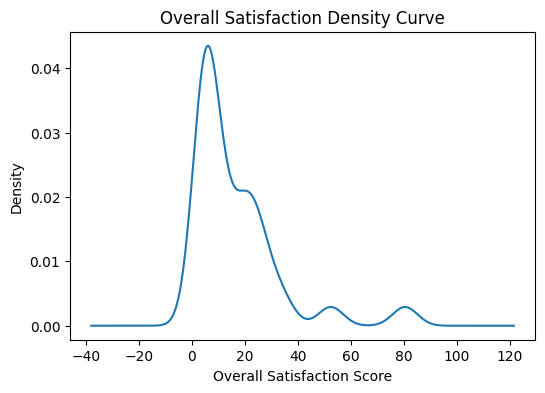

In [23]:
plt.figure(figsize=(6,4))
df['overall_satisfaction'].plot(kind='density')
plt.xlabel("Overall Satisfaction Score")
plt.title("Overall Satisfaction Density Curve")
plt.show()

In [19]:
def sentiment_label(score):
    if score >= 4:
        return "Positive"
    elif score >= 3:
        return "Neutral"
    else:
        return "Negative"

df['sentiment'] = df['overall_satisfaction'].apply(sentiment_label)

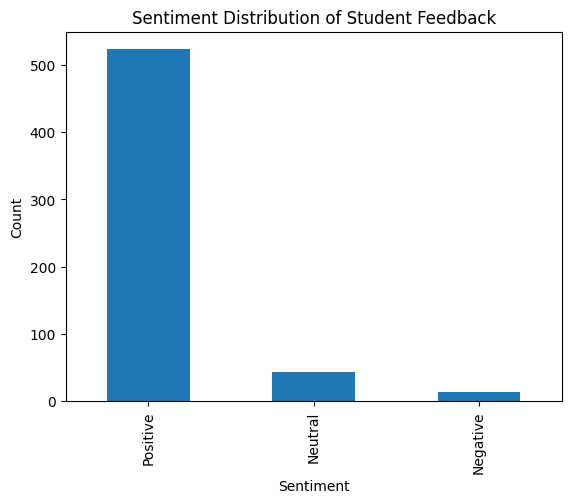

In [20]:
import matplotlib.pyplot as plt

plt.figure()
df['sentiment'].value_counts().plot(kind='bar')
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution of Student Feedback")
plt.show()